## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

### Dataset Understanding:

1. 'application_data.csv'  contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

##### Importing the libraries

In [1]:
#import the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### Data Cleaning :

##### Read the dataset (Application Data)

In [3]:
app_inp = pd.read_csv(r'C:\Users\Srilathaa Vasu\Jupyter Notebooks\IIIT-B\Assignments\Credit EDA Assignment\Dataset\application_data.csv')

In [4]:
#Print the head of the data frame.
pd.set_option('display.max_columns', None)
app_inp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
app_inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
app_inp.shape

(307511, 122)

In [7]:
app_inp.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Fixing the rows and columns 

In [8]:
list(app_inp.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [9]:
#Removing all the unwanted/unneccesary columns from the dataset
del_col =['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
          'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
          'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
          'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','DAYS_LAST_PHONE_CHANGE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
          'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']

In [10]:
app_inp.drop(del_col,axis=1,inplace=True)

### Checking Data Types

In [11]:
app_inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 95 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [12]:
app_inp.select_dtypes(include='float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

In [13]:
app_inp['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [14]:
app_inp['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
47.0          1
344.0         1
30.0          1
26.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [15]:
app_inp['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

Since the mode for following columns are zero, we can fill the null values with mode(zero). <br>
['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'] <br> <br>
After handling the missing values, we can transform these columns into 'int' datatype for further analysis.

In [16]:
#Converting float64 datatypes into int64.
col_int = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
           'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
           'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE' ]

In [17]:
app_inp.loc[:,col_int] = app_inp.loc[:,col_int].apply(lambda x: x.fillna(0))
app_inp.loc[:,col_int] = app_inp.loc[:,col_int].apply(lambda x: x.astype(int))

### Analysing 'Application Data' dataset

### Impute/Remove the missing values

In [18]:
#Counting the missing values
app_inp.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 95, dtype: int64

In [19]:
#Calculating the percentage of null values in each columns
null_per = app_inp.isnull().sum()/len(app_inp)*100

In [20]:
#If the percentage of null values is greater than 50%, we can remove those columns
app1 = app_inp.loc[:, app_inp.isnull().sum()/len(app_inp)*100 < 50]

In [21]:
app1.shape

(307511, 54)

* We have removed the columns having more than 50% null values.

In [22]:
#checking remaining null values columns
new_null = app1.isnull().sum()/len(app1)*100
new_null.sort_values(ascending=False).head(20)

FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_AVG                   49.760822
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_AVG     48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
NAME_TYPE_SUITE                  0.420148
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0.003902
CNT_FAM_MEMBERS                  0.000650
ORGANIZATION_TYPE                0.000000
LIVE_CITY_NOT_WORK_CITY          0.000000
SK_ID_CURR                       0.000000
REG_CITY_NOT_LIVE_CITY           0.000000
OBS_30_CNT_SOCIAL_CIRCLE         0.000000
dtype: float64

We have to check whether we can impute missing values for any columns.

We have already filled the missing values with the mode value for some columns which are mentioned below.
['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR'].

##### Handling missing values in 'NAME_TYPE_SUITE' column

In [23]:
app1['NAME_TYPE_SUITE'].isnull().sum()

1292

In [24]:
app1['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

* 'NAME_TYPE_SUITE' is a categorical column. We can impute the missing values by finding the mode.

In [25]:
# fill the missing values with mode value of name_type_suite in app1.
suite_mode = app1['NAME_TYPE_SUITE'].mode()[0]
app1['NAME_TYPE_SUITE'].fillna(suite_mode,inplace=True)

In [26]:
app1['NAME_TYPE_SUITE'].isnull().sum()

0

##### Handling missing values in 'EXT_SOURCE_2' column

In [27]:
app1['EXT_SOURCE_2'].isnull().sum()

660

In [28]:
app1['EXT_SOURCE_2'].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

- 'EXT_SOURCE_2' is a continuous columns. So we need to check the outliers.

<AxesSubplot:xlabel='EXT_SOURCE_2'>

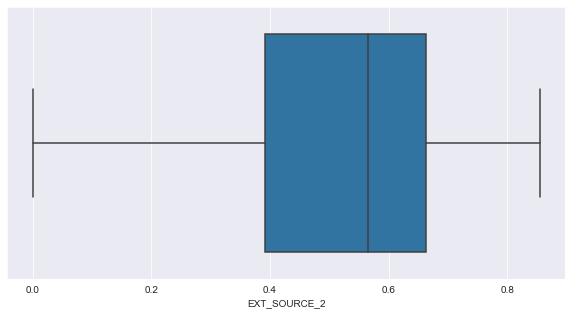

In [29]:
#Creating box plot to check outliers in 'EXT_SOURCE_2' column.
plt.figure(figsize=[10,5])
sns.set_style("darkgrid")
sns.boxplot(app1['EXT_SOURCE_2'])

- We can fill missing values of 'EXT_SOURCE_2' column using the mean. Since there are no outliers, we can calculate the mean to fill the missing values.

In [30]:
# fill the missing values with mean value of ext_source_2 in app1.
ext_sou_mean = round(app1['EXT_SOURCE_2'].mean(),2)
app1['EXT_SOURCE_2'].fillna(ext_sou_mean,inplace=True)

In [31]:
app1['EXT_SOURCE_2'].isnull().sum()

0

##### Handling missing values in 'EXT_SOURCE_3' column

In [32]:
app1['EXT_SOURCE_3'].isnull().sum()

60965

In [33]:
app1['EXT_SOURCE_3'].value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

<AxesSubplot:xlabel='EXT_SOURCE_3'>

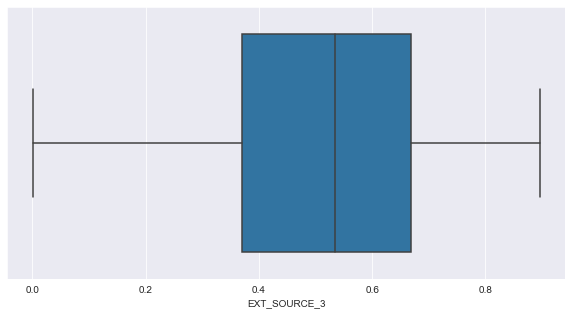

In [34]:
#Creating box plot to check outliers in 'EXT_SOURCE_3' column.
plt.figure(figsize=[10,5])
sns.boxplot(app1['EXT_SOURCE_3'])

- Since 'EXT_SOURCE_3' has no outliers, we are following similar approach of computing mean like 'EXT_SOURCE_2'

In [35]:
# fill the missing values with mean value of ext_source_3 in app1.
ext_sou_mean_1 = round(app1['EXT_SOURCE_3'].mean(),2)
app1['EXT_SOURCE_3'].fillna(ext_sou_mean_1,inplace=True)

In [36]:
app1['EXT_SOURCE_3'].isnull().sum()

0

##### Handling gender column

In [37]:
app1['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

* 'XNA' indicates the missing values. <br>
Missing value does not always be present as null.

- Since the female value is having majority and there are only four missing values, we can replace the missing values with 'F'(Female).

In [38]:
#Replacing the 'XNA' values with 'F'
app1.loc[app1['CODE_GENDER']=='XNA','CODE_GENDER']='F'

In [39]:
app1['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

##### Handling 'DAYS_REGISTRATION' column

In [40]:
app1['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

The client's age cannot be a negative value. We need to convert the 'DAYS_BIRTH' from days into age(in years) and find the absolute value to get the client's age.

In [41]:
app1['DAYS_BIRTH'] = abs(app1['DAYS_BIRTH']/365).astype(int)

In [42]:
app1['DAYS_BIRTH'].describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

### Handling Outliers

###### CNT_CHILDREN variable

<AxesSubplot:xlabel='CNT_CHILDREN'>

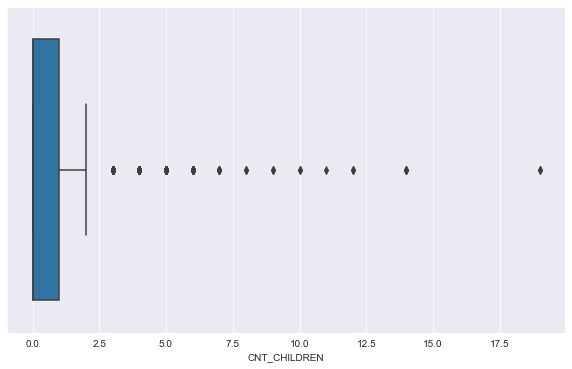

In [43]:
#plot the boxplot of cnt_children variable
plt.figure(figsize=[10,6])
sns.boxplot(app1['CNT_CHILDREN'])

In the above graph, we can see that there are some values above 10. Humans cannot have so many children. So, they can be referred as outliers.

##### AMT_INCOME_TOTAL column

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

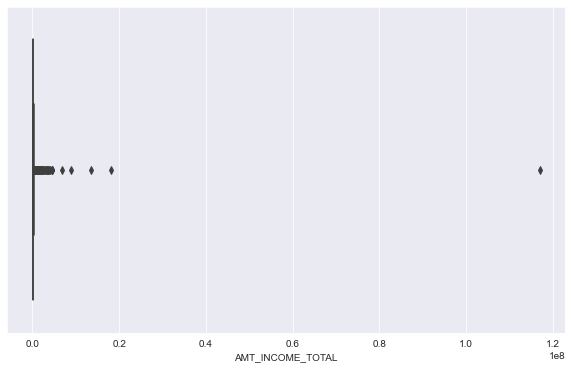

In [44]:
#plot the boxplot of amt_income_total variable
plt.figure(figsize=[10,6])
sns.boxplot(app1['AMT_INCOME_TOTAL'])

In the above graph, we can observe that there is a income of above 1.0M. So, they can be referred as outliers.

##### DAYS_BIRTH column <br>
We have found the age of the client from the days of birth. We can create bins to analyse the data significantly.

In [45]:
app1['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [46]:
app1['AGE'] = pd.cut(app1['DAYS_BIRTH'],bins=[15,25,40,60,100],labels=['Very_young','Young','Middle_age','Senior_citizen'])

In [47]:
app1['AGE'].describe()

count         307511
unique             4
top       Middle_age
freq          142220
Name: AGE, dtype: object

### Checking for imbalance in the dataframe

In [48]:
app1['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

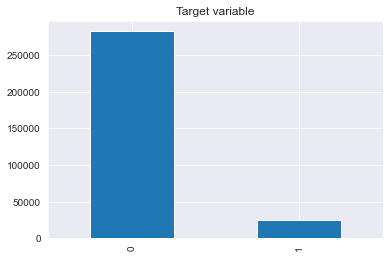

In [49]:
app1['TARGET'].value_counts().plot.bar()
plt.title('Target variable')
plt.show()

The imbalance is high in target variable.

In [50]:
# Dividing the original dataset into two different datasets 
df0 = app1[app1['TARGET'] == 0]
df1 = app1[app1['TARGET'] == 1]

In [51]:
# Calculating the imbalance ratio
round(len(df0)/len(df1),2)

11.39

### Univariate Analysis 

##### Gender variable

<AxesSubplot:title={'center':'Gender distribution for Target 0'}, ylabel='CODE_GENDER'>

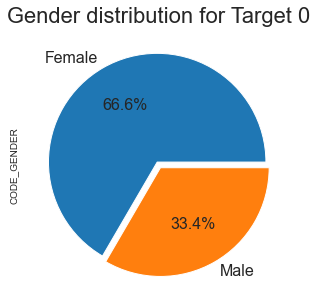

In [52]:
#Plotting for gender variable of target=0
plt.figure(figsize=[10,5])
plt.title('Gender distribution for Target 0',fontsize=22)
textprops={'fontsize':16}
df0['CODE_GENDER'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%',labels=['Female','Male'],explode=(0.03,0.03),textprops=textprops)

<AxesSubplot:title={'center':'Gender distribution for Target 1'}, ylabel='CODE_GENDER'>

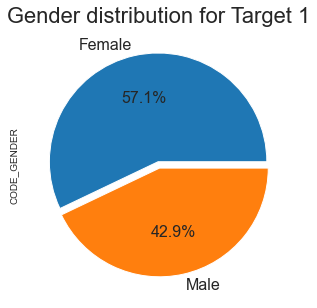

In [53]:
#Plotting for gender variable of target=1
plt.figure(figsize=[10,5])
plt.title('Gender distribution for Target 1',fontsize=22)
textprops={'fontsize':16}
df1['CODE_GENDER'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%',labels=['Female','Male'],explode=(0.03,0.03),textprops=textprops)

* From the above two pie charts, we can conclude that the number of female count is more than male.
* On the other hand, we can see that while repaying the loan males population is more likely to default than female customer.

##### NAME_TYPE_SUITE variable

In [54]:
# function to count plot 
def uni_plot(inp):

    sns.despine
    fig,(x1,x2) = plt.subplots(1,2,figsize=(24,8))
    
    sns.countplot(x=inp, data=df0,ax=x1)
    x1.set_ylabel('Total Counts',fontsize=14)
    x1.set_title(f'Distribution of {inp} for Target 0',fontsize=20)
    x1.set_xticklabels(x1.get_xticklabels(),rotation=90,fontsize=16)
    
    sns.countplot(x=inp, data=df1,ax=x2)
    x2.set_ylabel('Total Counts',fontsize=14)
    x2.set_title(f'Distribution of {inp} for Target 1',fontsize=20)    
    x2.set_xticklabels(x2.get_xticklabels(),rotation=90,fontsize=16)
    
    plt.show()

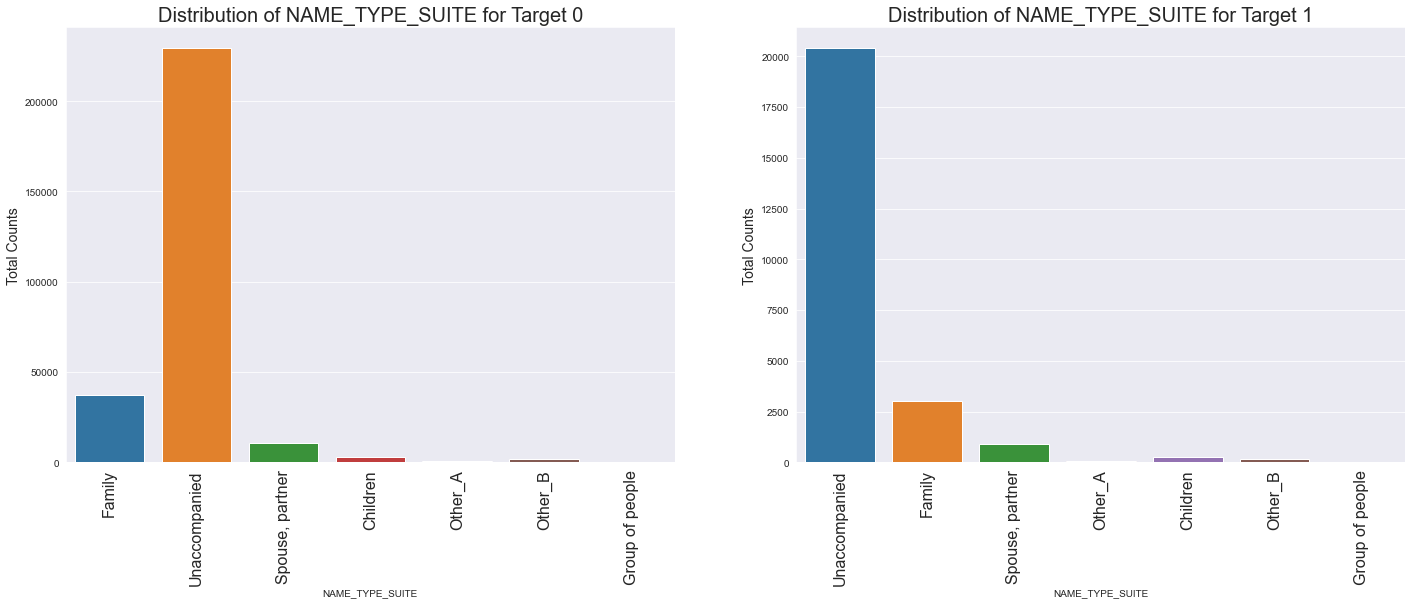

In [55]:
uni_plot('NAME_TYPE_SUITE')

* From the 'NAME_TYPE_SUITE' column, we can observe that mostly customers having no companion apply for the loan.

##### NAME_INCOME_TYPE variable

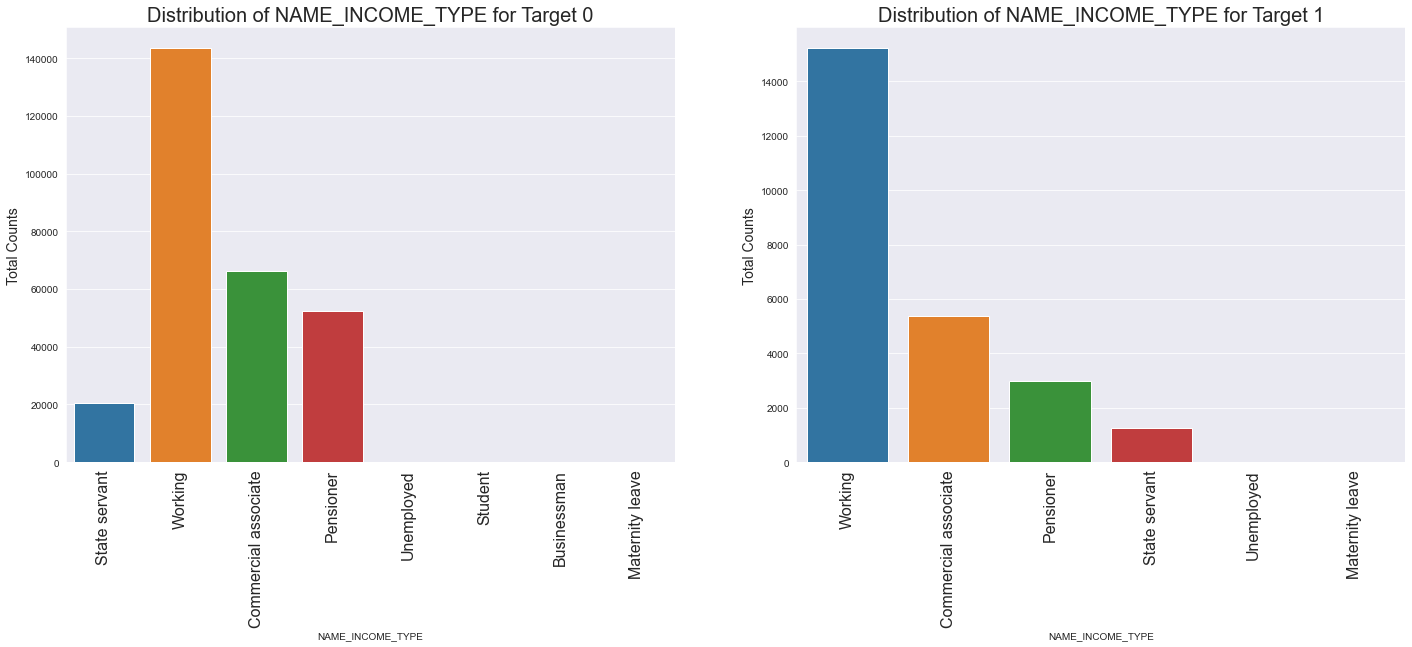

In [56]:
uni_plot('NAME_INCOME_TYPE')

* From the NAME_INCOME_TYPE column, we can observe that the Students and Businessman don't default.
* We can see that working customer apply for more loans followed by Commercial Associate.
* We can also observe that working class people are more likely to default the loan.

##### NAME_CONTRACT_TYPE variable

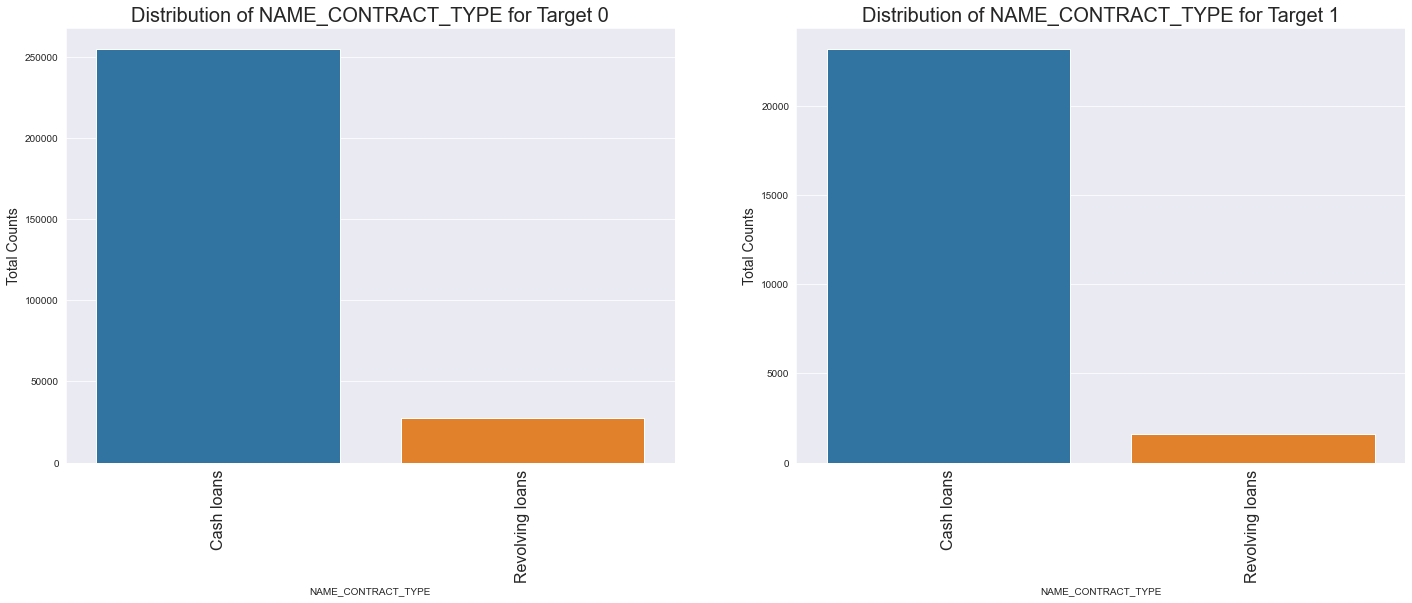

In [57]:
uni_plot('NAME_CONTRACT_TYPE')

* From 'NAME_CONTRACT_TYPE' column, we can observe that cash loans have higher percentage when compared with revolving loans.
* Customers who took cash loans are more likely to have difficulty in paying the loans and there is a decrease in the percentage of Payment Difficulties who opt for revolving loans.

##### NAME_HOUSING_TYPE variable

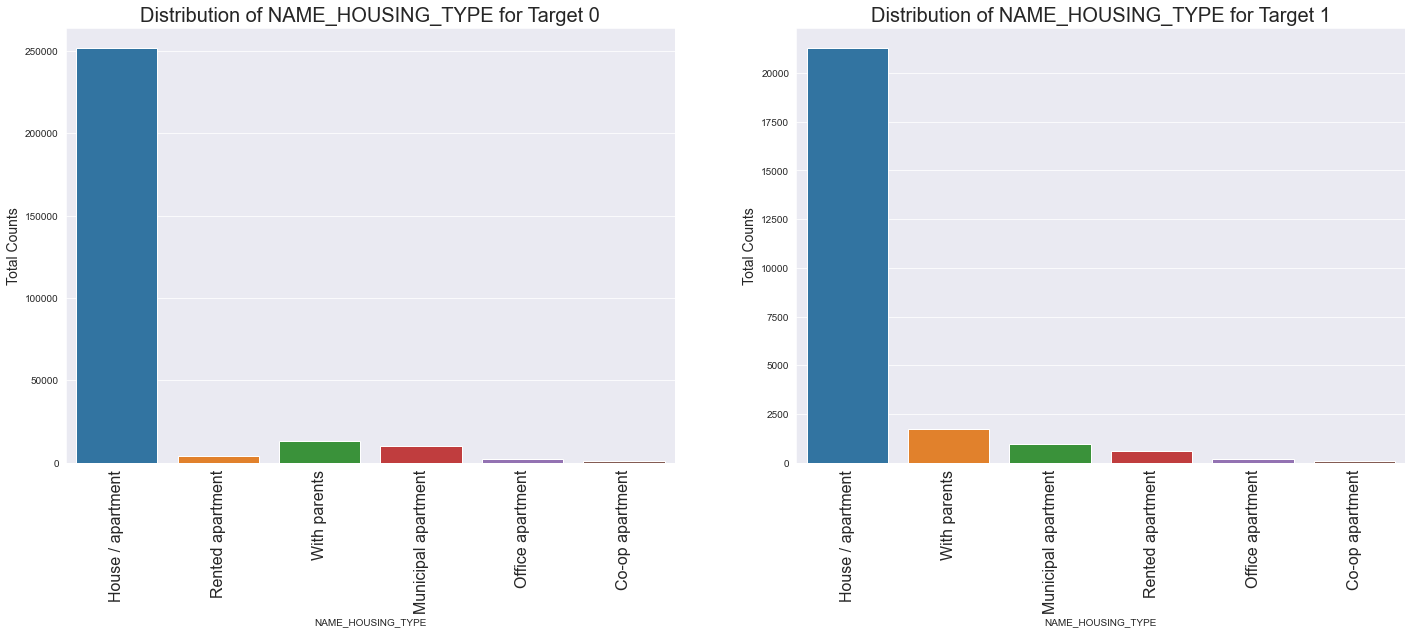

In [58]:
uni_plot('NAME_HOUSING_TYPE')

* From the NAME_HOUSING_TYPE column, we can observe that customers having house/apartments apply for more loans.
* We can also notice that customers with house/apartments are having more payment problems and customers with co-op apartments have least problems.

#####  NAME_EDUCATION_TYPE variable

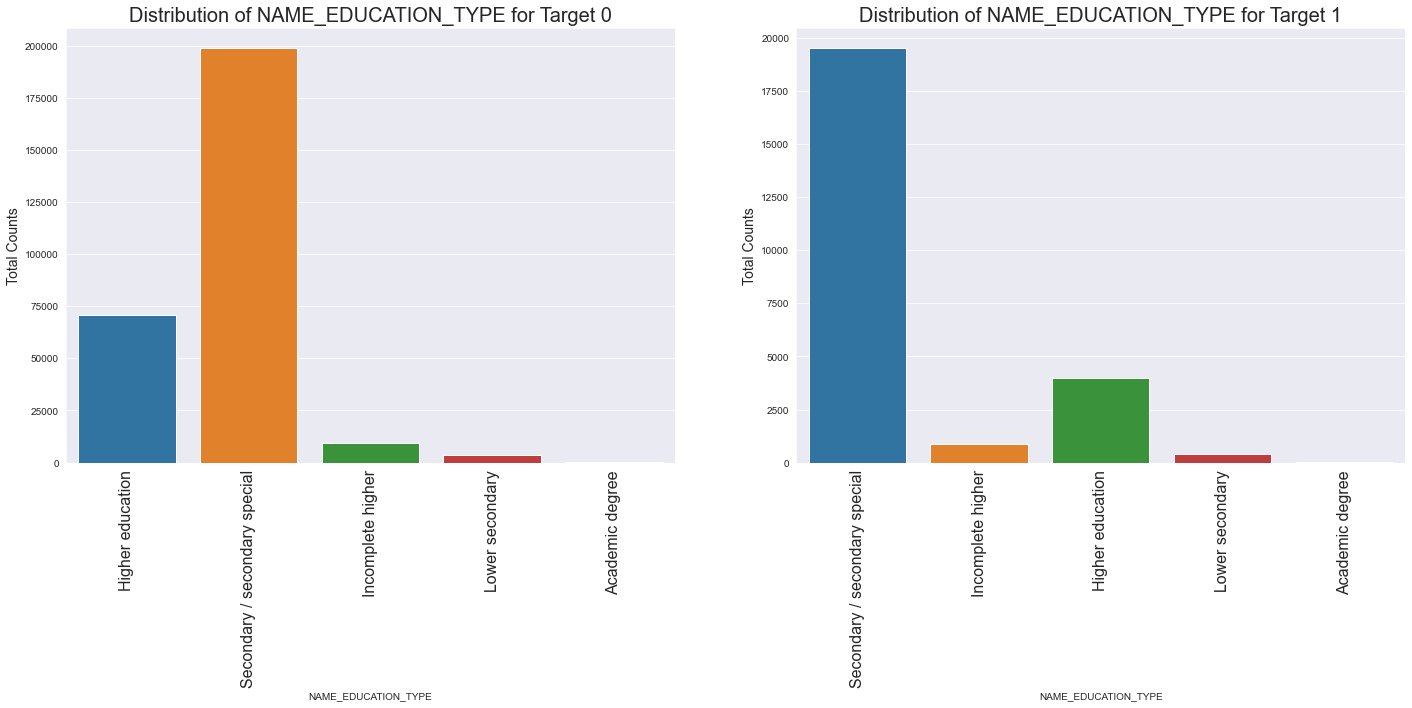

In [59]:
uni_plot('NAME_EDUCATION_TYPE')

* From NAME_EDUCATION_TYPE column, we can observe that majority of people who have taken loan have completed secondary special.

##### NAME_FAMILY_STATUS VARIABLE

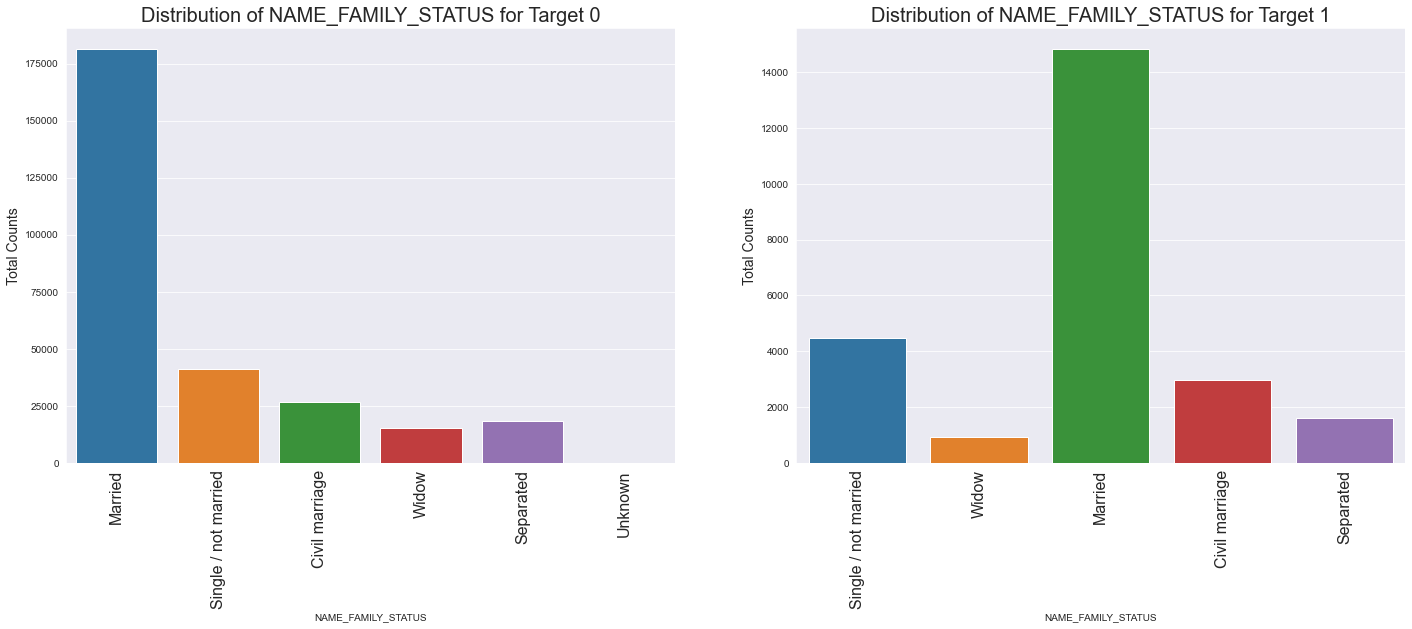

In [60]:
uni_plot('NAME_FAMILY_STATUS')

* From the NAME_FAMILY_STATUS column, we can observe that most of the customers who took loan are married followed by single/not married.
* Customers who are married also have highest percentage of payment problems followed by single/not married.

### Bivariate Analysis

##### AMT_INCOME_TOTAL vs AMT_CREDIT

In [61]:
# function to scatter plot 
def plot_bi (x,y):

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x= x, y= y,data=df0,ax=ax1)
    ax1.set_xlabel(x, fontsize=16)    
    ax1.set_ylabel(y,fontsize=16)
    ax1.set_title(f'{x} vs {y} for Target 0',fontsize=18)
    
    sns.scatterplot(x= x, y= y,data=df1,ax=ax2)
    ax2.set_xlabel(x, fontsize=16)    
    ax2.set_ylabel(y, fontsize=16)
    ax2.set_title(f'{x} vs {y} for Target 1',fontsize=18)
            
    plt.show()

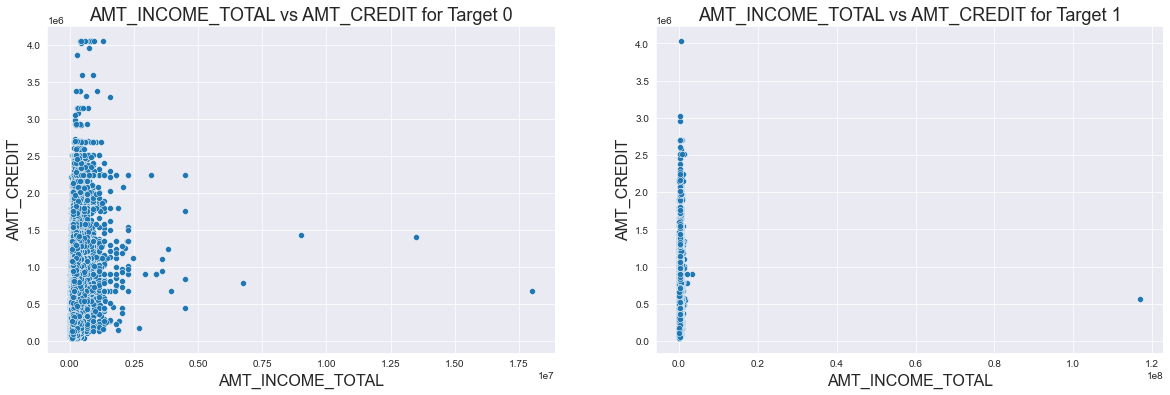

In [62]:
plot_bi('AMT_INCOME_TOTAL','AMT_CREDIT')

* From the above scatter plot, we can observe that customers with low income take more loans compared to others.
* Also, customers with low income have more payment problems.

##### DAYS_EMPLOYED vs AMT_INCOME_TOTAL

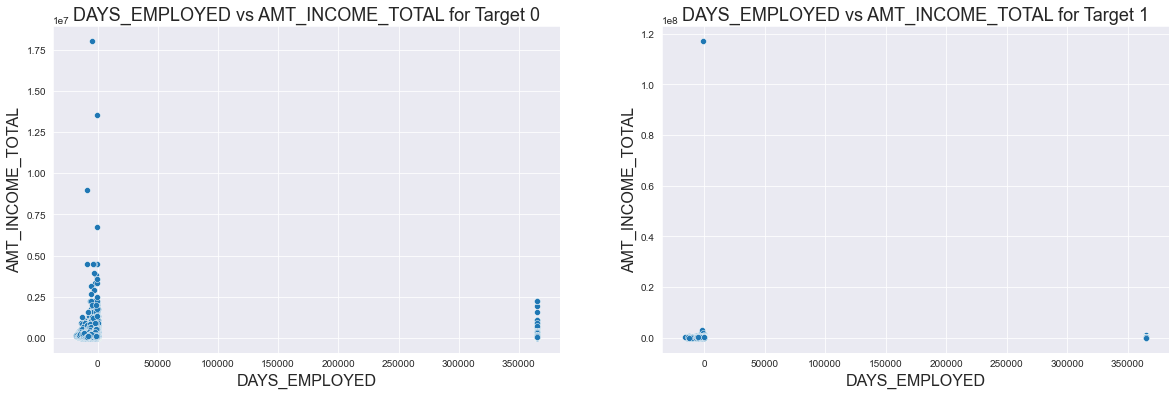

In [63]:
plot_bi('DAYS_EMPLOYED','AMT_INCOME_TOTAL')

* From the above plot, we can see that people with low incomes have more payment problems.

##### AMT_CREDIT vs AMT_ANNUITY

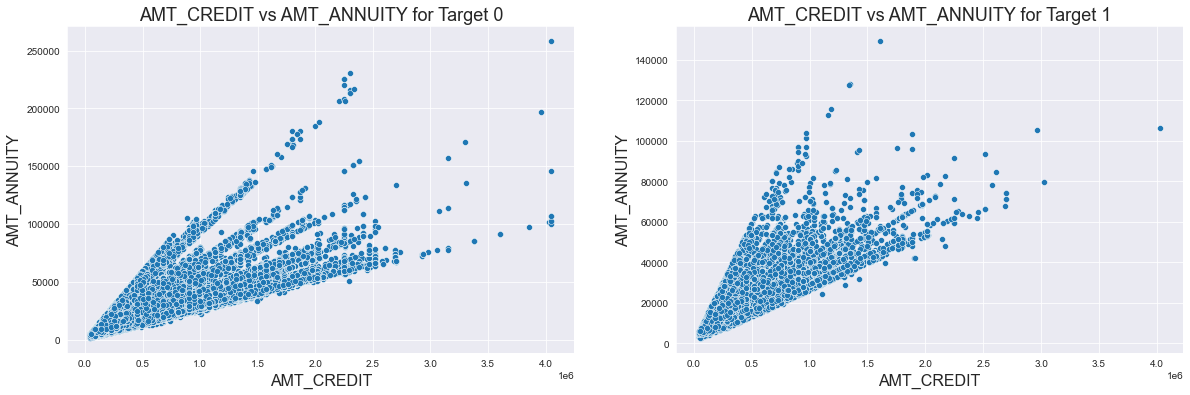

In [64]:
plot_bi('AMT_CREDIT','AMT_ANNUITY')

* From the above plot, we can see that as the loan amount increases,  the repayment term also increases.

##### AMT_INCOME_TOTAL vs NAME_EDUCATION_TYPE

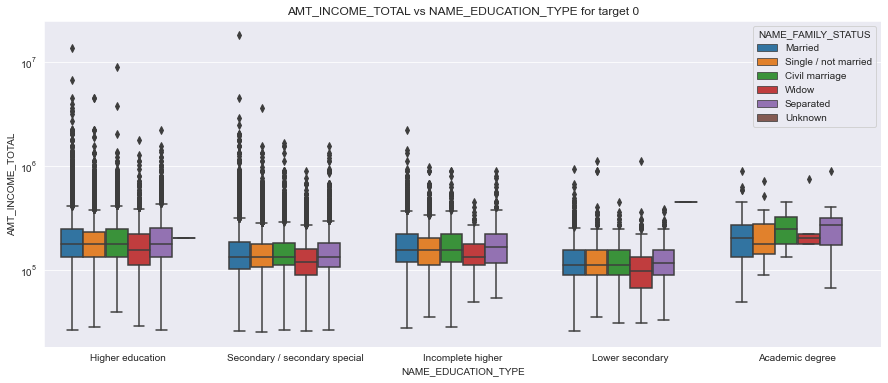

In [65]:
#Box plot for target = 0
plt.figure(figsize=[15,6])
plt.yscale('log')
sns.boxplot(data = df0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('AMT_INCOME_TOTAL vs NAME_EDUCATION_TYPE for target 0')
plt.show()

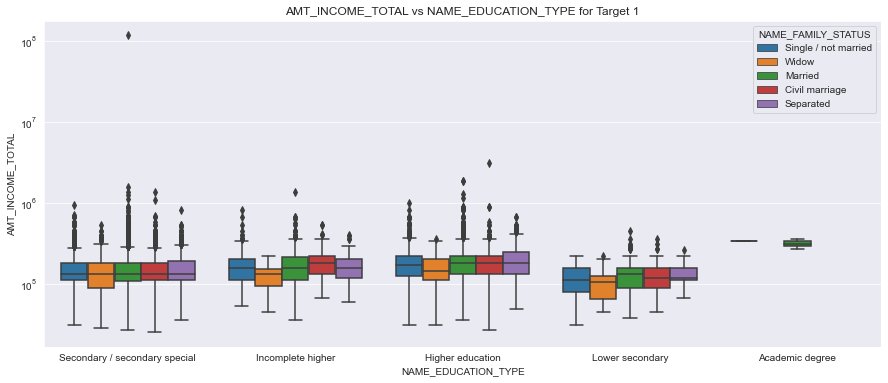

In [66]:
#Box plot for target = 1
plt.figure(figsize=[15,6])
plt.yscale('log')
sns.boxplot(data = df1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('AMT_INCOME_TOTAL vs NAME_EDUCATION_TYPE for Target 1')
plt.show()

* From the above plots, we can notice that for Education type 'Higher education' the income amount is mostly equal with family status. 
* Less outlier are present for Academic degree but their income amount is little higher than Higher education. 
* Lower secondary have less income amount than others.

### Finding the top 10 correlation 

In [67]:
#Finding correlation for target = 0 
# Dropping the null values 

corr_0 = df0.corr().abs().unstack().sort_values().dropna()

## Removing the correlation where value = 1
corr_0 = corr_0[corr_0 != 1.0].sort_values(ascending=False)

In [68]:
corr_0.head(15)

OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998510
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998510
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997018
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997018
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993582
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993582
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.988153
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988153
AMT_GOODS_PRICE               AMT_CREDIT                      0.987250
AMT_CREDIT                    AMT_GOODS_PRICE                 0.987250
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.985603
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.985603
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.971032
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.971032
YEARS_

In [69]:
#Finding correlation for target = 1
# Dropping the null values 

corr_1 = df1.corr().abs().unstack().sort_values().dropna()

## Removing the correlation where value = 1
corr_1 = corr_1[corr_1 != 1.0].sort_values(ascending=False)

In [70]:
corr_1.head(15)

OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998270
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998270
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997187
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997187
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.996124
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.996124
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989195
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989195
                              FLOORSMAX_AVG                   0.986594
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986594
AMT_GOODS_PRICE               AMT_CREDIT                      0.983103
AMT_CREDIT                    AMT_GOODS_PRICE                 0.983103
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.980466
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.980466
YEARS_

* From corr_0 & corr_1, we can observe that the correlations are almost same for both cases.
* OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE shows the highest correlation.
* We can also see that some columns are directly related to each other like 'AMT_GOODS_PRICE, AMT_CREDIT' 

##### Read the second dataset (Previous Application)

In [71]:
app_pre = pd.read_csv(r'C:\Users\Srilathaa Vasu\Jupyter Notebooks\IIIT-B\Assignments\Credit EDA Assignment\Dataset\previous_application.csv')

In [72]:
#Print the head of the data frame.
pd.set_option('display.max_columns', None)
app_pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
app_pre.shape

(1670214, 37)

In [74]:
app_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [75]:
app_pre.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [76]:
# Removing all the columns with more than 50% of null values
app_pre1 = app_pre.loc[:,app_pre.isnull().mean()<=0.5]
app_pre1.shape

(1670214, 33)

### Univariate Analysis

##### NAME_CONTRACT_STATUS

<AxesSubplot:title={'center':'NAME_CONTRACT_STATUS'}, ylabel='NAME_CONTRACT_STATUS'>

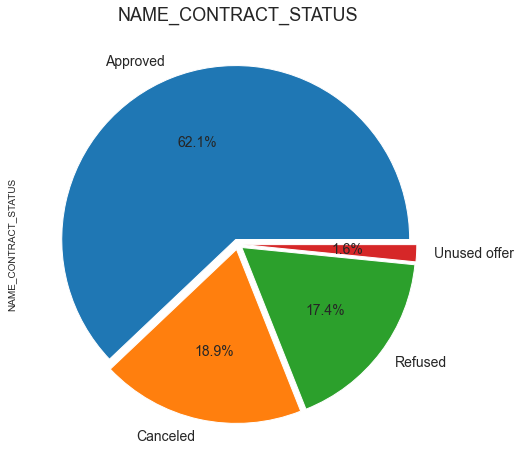

In [77]:
#Plotting for name_contract_status variable 
plt.figure(figsize=[20,8])
plt.title('NAME_CONTRACT_STATUS',fontsize=18)
textprops={'fontsize':14}
app_pre1['NAME_CONTRACT_STATUS'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%',explode=(0.03,0.03,0.03,0.03),textprops=textprops)

* From the pie chart, we can observe that approved loans has the highest percentage.
* We can also see that only few loans have been refused.

##### NAME_CONTRACT_TYPE

In [78]:
# function for count plot 
def uni_plot1(inp):

    sns.despine
    fig,x1 = plt.subplots(1,figsize=(12,6))
    sns.countplot(x = inp, data=app_pre1 ,ax = x1,hue='NAME_CONTRACT_STATUS')
    x1.set_ylabel('Total Counts',fontsize=14)
    x1.set_title(f'Distribution of {inp}',fontsize=16)
    x1.set_xticklabels(x1.get_xticklabels(),fontsize=14)
    
    plt.show()

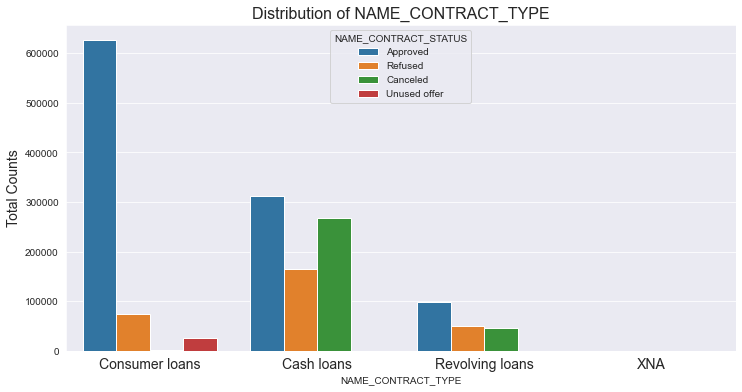

In [79]:
uni_plot1('NAME_CONTRACT_TYPE')

* From the above graph, we can notice that most of the previous applications are consumer loans and cash loans.

##### NAME_CLIENT_TYPE

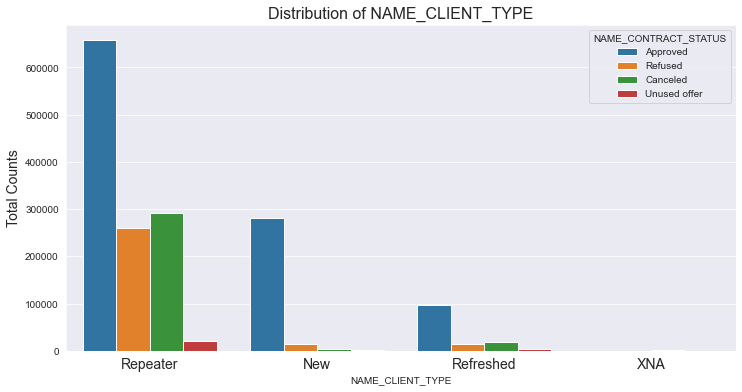

In [80]:
uni_plot1('NAME_CLIENT_TYPE')

* From the above graph, we can observe that most of the loan applications are from repeaters.

##### CODE_REJECT_REASON

In [81]:
# Removing the column values of 'XNA' and 'XAP'
app_pre1 = app_pre1.drop(app_pre[app_pre['CODE_REJECT_REASON']=='XAP'].index)
app_pre1 = app_pre1.drop(app_pre[app_pre['CODE_REJECT_REASON']=='XNA'].index)

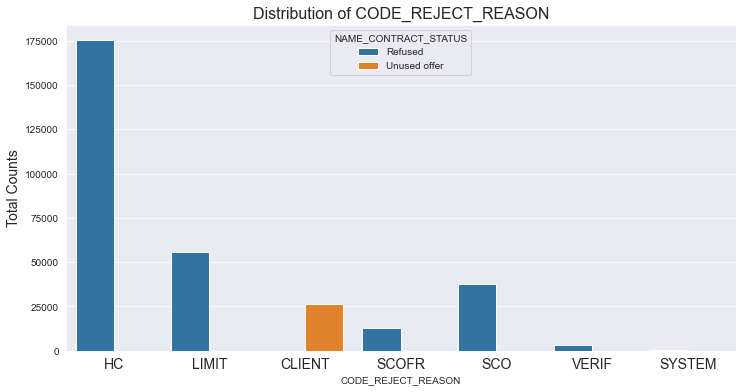

In [82]:
uni_plot1('CODE_REJECT_REASON')

* From the CODE_REJECT_REASON column, we can see that 'HC' is the reason for majority of the loans to be rejected.

##### NAME_PORTFOLIO

In [83]:
# Removing the column values of 'XNA' and 'XAP'
app_pre1 = app_pre1.drop(app_pre1[app_pre1['NAME_PORTFOLIO']=='XNA'].index)

<AxesSubplot:title={'center':'NAME_PORTFOLIO'}, ylabel='NAME_PORTFOLIO'>

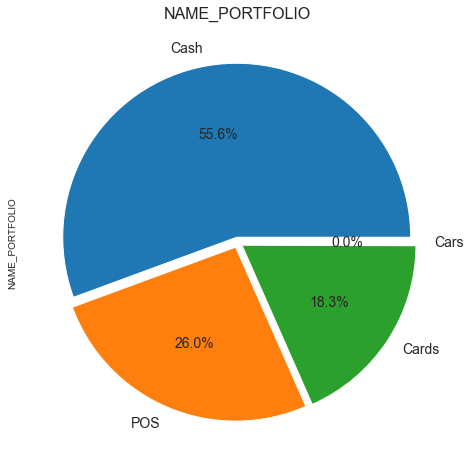

In [84]:
#Plotting for name_payment_type variable 
plt.figure(figsize=[20,8])
plt.title('NAME_PORTFOLIO',fontsize=16)
textprops={'fontsize':14}
app_pre1['NAME_PORTFOLIO'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%',explode=(0.03,0.03,0.03,0.03),textprops=textprops)

* From the pie chart, we can infer that the majority of previous applications have been applied for 'POS' followed by 'Cash'.

### Bivariate Analysis

##### AMT_CREDIT vs AMT_GOODS_PRICE

In [85]:
# function to scatter plot 
def plot_bi1 (x,y):

    fig,ax1 = plt.subplots(1,figsize=(12,6))
    
    sns.scatterplot(x= x, y= y,data=app_pre1,ax=ax1)
    ax1.set_xlabel(x, fontsize=13)    
    ax1.set_ylabel(y,fontsize=13)
    ax1.set_title(f'{x} vs {y} ',fontsize=16)
    
    plt.show()

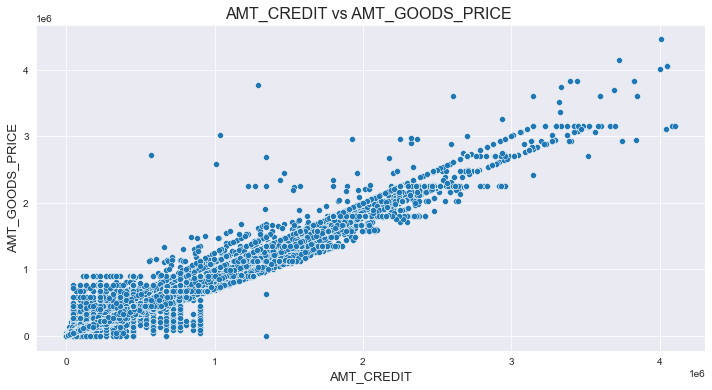

In [86]:
plot_bi1('AMT_CREDIT','AMT_GOODS_PRICE')

* In the previous applications, we can observe that the amount credited is highly influenced by the price of the goods.

##### AMT_CREDIT vs AMT_ANNUITY

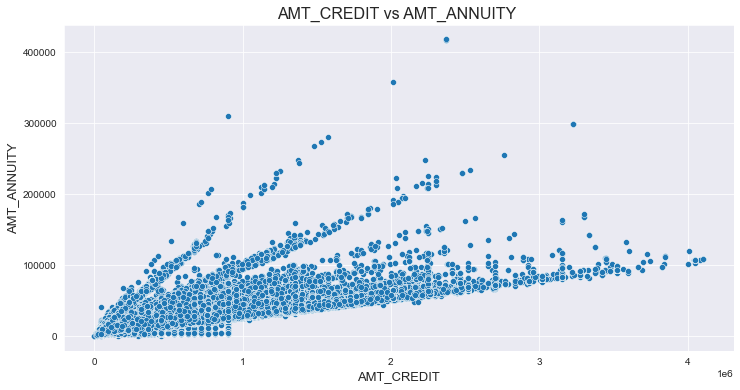

In [87]:
plot_bi1('AMT_CREDIT','AMT_ANNUITY')

##### AMT_ANNUITY vs AMT_GOODS_PRICE

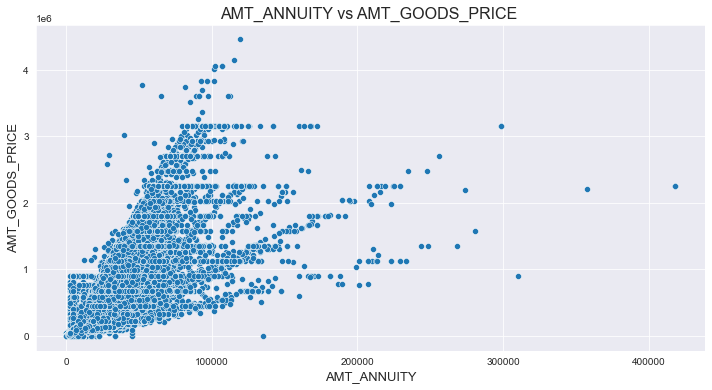

In [88]:
plot_bi1('AMT_ANNUITY','AMT_GOODS_PRICE')

* From the above two scatter plots, we can notice that AMT_ANNUITY has a high influence over the goods price and credit.

### Merge the files and analyse the data

In [89]:
# Lets merge both the files and analyse patterns in the data
new_df = pd.merge(left = app1, right = app_pre, how='inner', on='SK_ID_CURR',suffixes='_x')

In [90]:
new_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2,2,2,2,0,0,0,0,0,1,Very_young,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510000,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1,0,1,0,0,0,0,0,0,0,Middle_age,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510000,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1,0,1,0,0,0,0,0,0,0,Middle_age,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510000,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1,0,1,0,0,0,0,0,0,0,Middle_age,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Elect

In [91]:
new_df.shape

(1413701, 91)

In [92]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 91 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1413701 non-null  int64   
 1   TARGET                        1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_           1413701 non-null  object  
 3   CODE_GENDER                   1413701 non-null  object  
 4   FLAG_OWN_CAR                  1413701 non-null  object  
 5   FLAG_OWN_REALTY               1413701 non-null  object  
 6   CNT_CHILDREN                  1413701 non-null  int64   
 7   AMT_INCOME_TOTAL              1413701 non-null  float64 
 8   AMT_CREDIT_                   1413701 non-null  float64 
 9   AMT_ANNUITY_                  1413608 non-null  float64 
 10  AMT_GOODS_PRICE_              1412493 non-null  float64 
 11  NAME_TYPE_SUITE_              1413701 non-null  object  
 12  NAME_INCOME_TY

In [93]:
# Renaming the column names after merging

new_df = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [94]:
new_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,HOUR_APPR_PROCESS_START_PREV,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,729019.000000,715193.000000,729019.000000,715193.000000,729019.000000,715193.000000,736160.000000,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,6.641610e+05,1.094176e+06,1.413701e+06,1.413701e+06,664161.000000,4791.000000,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+05,5.875537e+05,2.701702e+04,5.277186e+05,2.074985e-02,4.421384e+01,6.870203e+04,-5.003233e+03,-3.034563e+03,2.150501e+00,2.059638e+00,2.037603e+00,1.198433e+01,1.207327e-02,4.396686e-02,3.604793e-02,7.360538e-02,2.221481e-01,1.740601e-01,5.114257e-01,4.931716e-01,0.977235,0.222317,0.976515,0.218556,0.977220,0.221945,0.099922,1.540740e+00,1.537008e-01,1.522906e+00,1.078021e-01,5.484894e-03,6.028149e-03,3.410198e-02,2.664913e-01,3.196935e-01,2.575495e+00,1.922744e+06,1.583718e+04,1.752436e+05,1.963541e+05,6.655317e+03,2.264512e+05,1.247893e+01,9.964321e-01,0.080175,0.189436,0.771284,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+05,3.849173e+05,1.395116e+04,3.532465e+05,1.334702e-02,1.190217e+01,1.452777e+05,3.551051e+03,1.507376e+03,9.006787e-01,4.957797e-01,4.886431e-01,3.232181e+00,1.092132e-01,2.050215e-01,1.864095e-01,2.611277e-01,4.156903e-01,3.791613e-01,1.909956e-01,1.791005e-01,0.061647,0.140943,0.067386,0.140270,0.062588,0.141436,0.103888,2.528944e+00,4.654353e-01,2.507192e+00,3.786711e-01,7.702591e-02,1.001966e-01,2.012902e-01,9.268428e-01,8.781444e-01,2.268756e+00,5.327153e+05,1.472491e+04,2.936222e+05,3.194813e+05,2.062030e+04,3.159376e+05,3.331474e+00,5.962560e-02,0.107784,0.090849,0.100644,7.835402e+02,7.695082e+03,1.456675e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,2.000000e+01,-1.791200e+04,-2.467200e+04,-7.197000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.173617e-08,5.272652e-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+0

In [95]:
# Removing the column values of 'XNA' and 'XAP'

new_df=new_df.drop(new_df[new_df['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
new_df=new_df.drop(new_df[new_df['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

new_df.shape

(59413, 91)

In [96]:
#Calculating the percentage of NAME_CONTRACT_STATUS
new_df['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Refused         58.549476
Approved        38.838301
Canceled         2.304210
Unused offer     0.308013
Name: NAME_CONTRACT_STATUS, dtype: float64

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

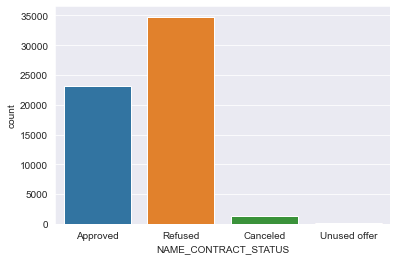

In [97]:
sns.countplot(new_df['NAME_CONTRACT_STATUS'])

### Univariate Analysis on new dataframe

##### NAME_CLIENT_TYPE

In [98]:
# function for count plot 
def uni_plot2(inp):

    sns.despine
    fig,x1 = plt.subplots(1,figsize=(12,6))
    sns.countplot(x = inp, data=new_df ,ax = x1,hue='NAME_CONTRACT_STATUS',palette='gist_heat_r')
    x1.set_ylabel('Total Counts',fontsize=14)
    x1.set_title(f'Distribution of {inp}',fontsize=16)
    x1.set_xticklabels(x1.get_xticklabels(),fontsize=14)
    
    plt.show()

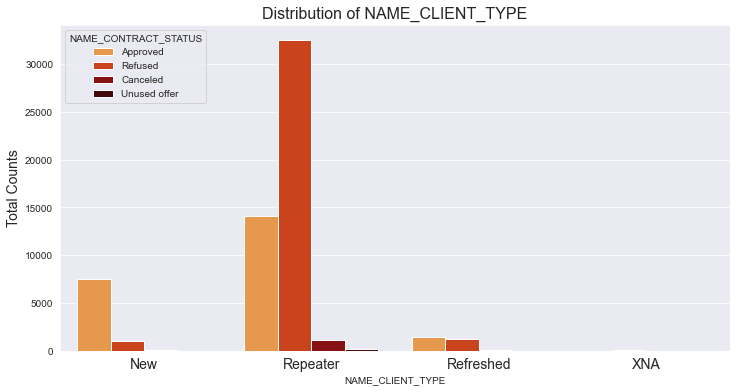

In [99]:
uni_plot2('NAME_CLIENT_TYPE')

* From the above plot, we can notice that most of the repeater applications have been refused.
* But we can even notice that the repeater applications have the highest approval.

##### NAME_CONTRACT_TYPE

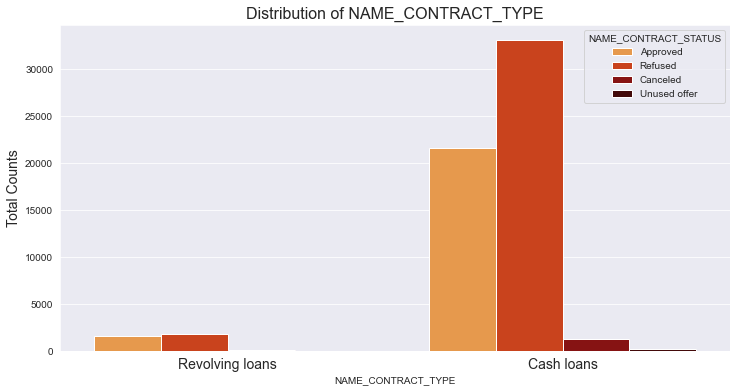

In [100]:
uni_plot2('NAME_CONTRACT_TYPE')

* From the above plot, we can notice that most of the applications for cash loans have been rejected.
* On the other hand, highest percentage of approved loans is also cash loans.

##### NAME_INCOME_TYPE

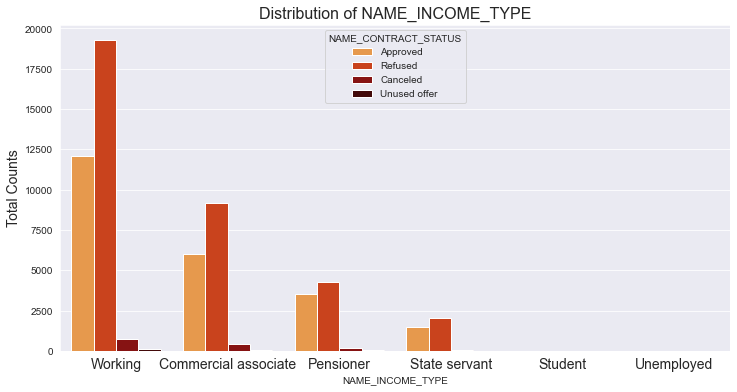

In [101]:
uni_plot2('NAME_INCOME_TYPE')

* From the above plot, we can notice that working people apply for more loans followed by commercial associate. 
* But we can also observe that the maximum application rejection is also from working customers.

##### NAME_CASH_LOAN_PURPOSE

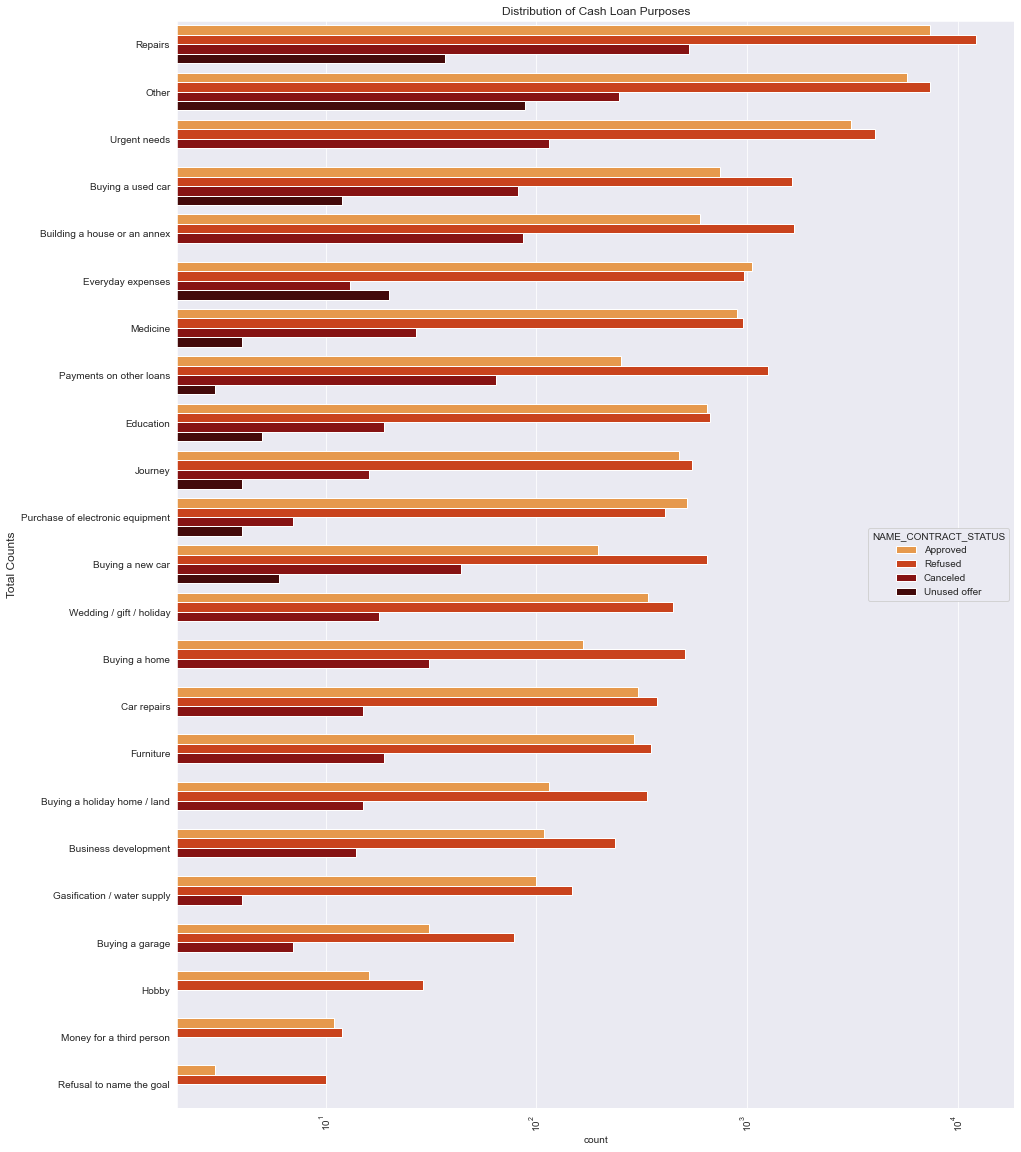

In [102]:
sns.despine
fig,x1 = plt.subplots(1,figsize=(15,20))
sns.countplot(y = 'NAME_CASH_LOAN_PURPOSE', data=new_df ,order=new_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue='NAME_CONTRACT_STATUS',palette='gist_heat_r')
x1.set_ylabel('Total Counts',fontsize=12)
plt.title(f'Distribution of Cash Loan Purposes')
plt.xticks(rotation=90)
plt.xscale('log')   
plt.show()

* From the plot, we can observe that most of the rejected loans are for 'repairs' purpose.
* We can also notice that 'education' and 'medicine' have equal number of approval and rejection.

##### OCCUPATION_TYPE

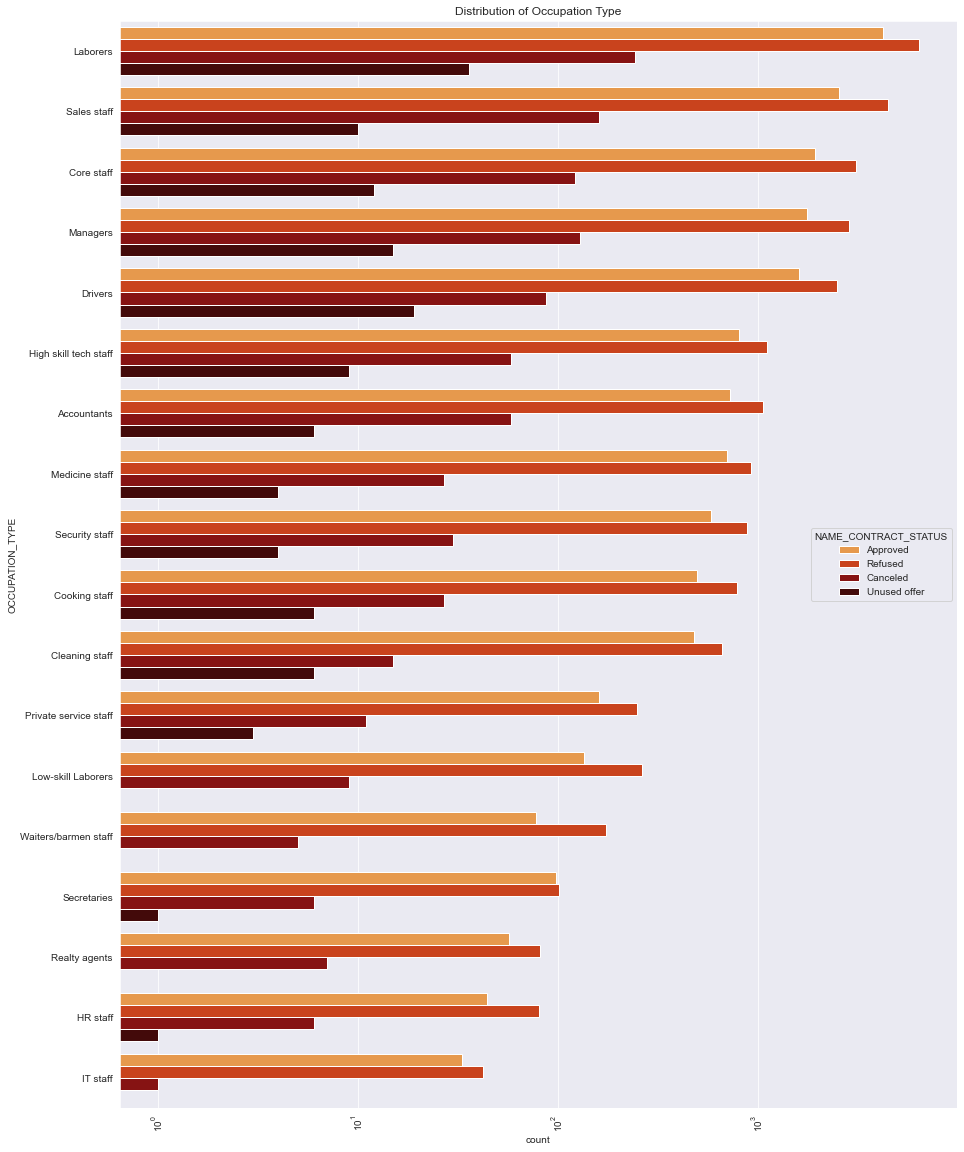

In [103]:
sns.despine
plt.figure(figsize=(15,20))
sns.countplot(y = 'OCCUPATION_TYPE', data=new_df ,order=new_df['OCCUPATION_TYPE'].value_counts().index,hue='NAME_CONTRACT_STATUS',palette='gist_heat_r')
x1.set_ylabel('Total Counts',fontsize=12)
plt.title('Distribution of Occupation Type')
plt.xticks(rotation=90)
plt.xscale('log')   
plt.show()

* From the plot, we can observe that most of the 'laborers' loan applications are rejected followed by 'sales staff'.
* We can also notice that 'Secretaries' have equal number of approvals and rejections.

### Conclusion 

* In the gender category, we can conclude that the loan applications from female customers are more when compared with male. On the other hand, we can see that while repaying the loan males population is more likely to default than female customer.

* 'Working' customers are having most number of unsuccessful payments. So bank should focus less on this group of people.

* AMT_ANNUITY has a high influence over the goods price and credit.

* Bank should avoid customers with low income as they have more payment problems.

* Bank should focus more on students and businessman as they don't default.